# Google Trend Data

This script prepares the weather data stored in `/data/raw/` and saves a cleaned and processed version to `/data/processed`.

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import glob
%matplotlib inline

# What trend files exist?

In [44]:
trend_files = glob.glob("../data/raw/google_searches/*.csv")
trend_files

['../data/raw/google_searches/multiTimeline - symptoms of West Nile - Chicago IL.csv',
 '../data/raw/google_searches/multiTimeline - dead birds - Chicago IL.csv',
 '../data/raw/google_searches/multiTimeline - west nile - Chicago IL.csv',
 '../data/raw/google_searches/multiTimeline - mosquito bites - Chicago IL.csv']

# Combine the files

In [111]:
trends = [pd.read_csv(_,skiprows=1,index_col="Month") for _ in trend_files]

trends = pd.concat(trends, axis =1)

trends.columns = ["googtrend_sym_wnv","googtrend_deadbirds","googtrend_westnile","googtrend_mosq_bites"]

trends.replace(to_replace="<1",value=0, inplace=True)

trends.googtrend_deadbirds = pd.to_numeric(trends.googtrend_deadbirds)
trends.googtrend_westnile = pd.to_numeric(trends.googtrend_westnile)

In [112]:
trends.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 2004-01 to 2019-01
Data columns (total 4 columns):
googtrend_sym_wnv       181 non-null int64
googtrend_deadbirds     181 non-null int64
googtrend_westnile      181 non-null int64
googtrend_mosq_bites    181 non-null int64
dtypes: int64(4)
memory usage: 7.1+ KB


# Visualize

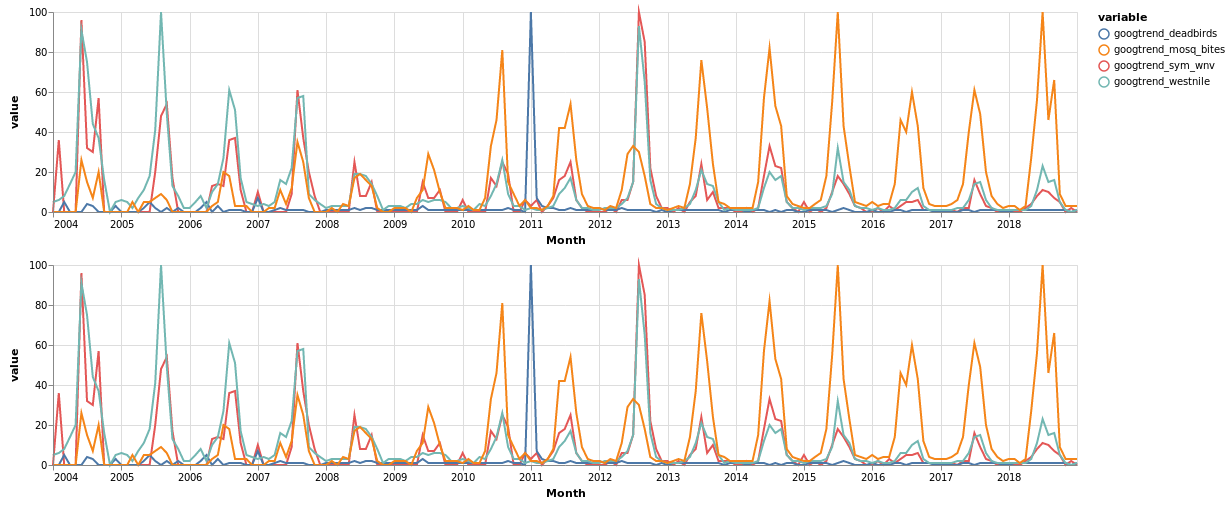

In [110]:
brush = alt.selection_interval(encodings=['x'])
p1 = alt.Chart(trends.reset_index().melt("Month")).mark_line().encode(x="Month:T",y="value",color="variable",tooltip="value:N").\
properties(width=1024,height=200).add_selection(brush)
p2 = alt.Chart(trends.reset_index().melt("Month")).mark_line().encode(x="Month:T",y="value",color="variable",tooltip="value:N").\
transform_filter(brush).properties(width=1024,height=200)
alt.vconcat(p1,p2)